# Exploratory Data Analysis on Employee Attrition

### Introduction, and Purpose

Hello there!

We will be performing EDA on employee attrition using the IBM mock HR dataset.

This one plays close to my heart, as one of the first projects that had me interested in data analysis was analysis of employee attrition for the purposes of calculating probabilities to use in long service leave provisioning (so that management can work out cash reserves required).

The purpose of this notebook is for myself:

<ul> 
    <li>practice of EDA in high dimensonality (35 features in this dataset);</li>
    <li>practice of attrition analysis specifically (common business use case);</li>
    <li>practice of predictive analytics using random forests, and;</li>
    <li>practice of full production (through to creation of API and hosting).</li>
</ul>

### Value-add for HR?

Understanding the patterns and being able to predict turnover can be of incredible value-add.

Direct costs include; reduction of turnover (the cost of hiring a new employee has been proven time and time again to be far more expensive than replacing an employee), and accurate cash reserving (in the case of employee resignation)

Indirect costs include; a better work culture (improvements perhaps to L&D intiatives, social impact for employees or just better work-life flexibility), and retention of better talent

### Key Analysis Consideations

Why do people leave? From my experience, this is limited to;

* Poor managers
* Better remuneration elsewhere
* Bad culture (and bad policies)

The HBR did a very indepth article on this in 1973, you can find it <a href="https://hbr.org/1973/07/why-employees-stay"> here </a>.

There are many take-aways but another is we make the assumption that  dissatisfied employees leave and satisfied employees stay. The article goes to emphasise that this is not always the case and there are many external factors which impact this. A nice exhibit from the article is here:

<img src="https://hbr.org/resources/images/article_assets/hbr/7307/73406_A.gif"></img>

In fact, there are so many external factors to consider such as: the state of the job market, attitudes towards older workers, technological influences on the market.

As such, any findings should serve as a <b>reference point</b> and not an end-all. They need to be corroborated against market research and, more importantly, honest conversations with staff.

### Dataset to be used

Refer <a href="https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset">here on Kaggle</a>

## Let's get started!

In [25]:
# import EDA packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from scipy import stats
import os
import matplotlib.gridspec as gridspec

# setting to show all columns in pandas

pd.options.display.max_columns = None
pd.options.display.max_rows = None

# set sns styles

sns.set_style('dark')
sns.set_palette('Set3')

# set plt settings

matplotlib.rcParams['figure.dpi']= 150

In [26]:
# read the file into dataframe

df_main = pd.read_csv('HR-Employee-Attrition.csv')

# read the head, let's get an idea of what this looks like

df_main.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [27]:
# clearly there are many features, let's have a look at the columns and their datatypes

df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

We can clearly see above that there are many features, both categorical and numerical.

Intuitively, just from scanning the list, we would expect many of these features to be correlated with attrition; i.e. we would expect job satisfaction to have a great impact on someone's decision to stay/leave the company.

Other features would be more relevant with a benchmark to market. For example, monthly income is both relative and absolute - we would expect that at the very low ends, monthly income would affect attrition, but at the higher ends, monthly income is relative to what that employee would expect at the <b> market level </b>

There are many potential issues that we will have to consider with these features, especially response bias. For example, there many be a tendency for employees to answer falsely on JobSatisfaction, or WorkLifeBalance or EnvironmentSatisfaction, in fear of potential retribution for their direct supervisors.

Let's have a look at nulls and outliers now;

In [28]:
df_main.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

What a clean dataset! (not that unexpected given that it is manufactured) - we still have to watch out for indirect nulls though (where a constant has been used to indicate null in the columns)

Based on reviewing the above, there's already a few features I suspect that we can immediately drop as it is unlikely to provide value, being; <b>EmployeeCount, EmployeeNumber</b>. Let's have a quick look at these.

In [29]:
# Let's check if all EmployeeCounts are equal to 1

print("Number of Employee Counts equal to 1 is: {}". format(df_main['EmployeeCount'].loc[df_main['EmployeeCount'] == 1].sum()))

# and based on the data dictionary, employee number is simply the employees number. While there can be
# features engineered from this (perhaps tenure, or at least tenure in the system), there are already other features
# such as YearAtCompany which effectively represent that.

Number of Employee Counts equal to 1 is: 1470


In [30]:
df_main.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


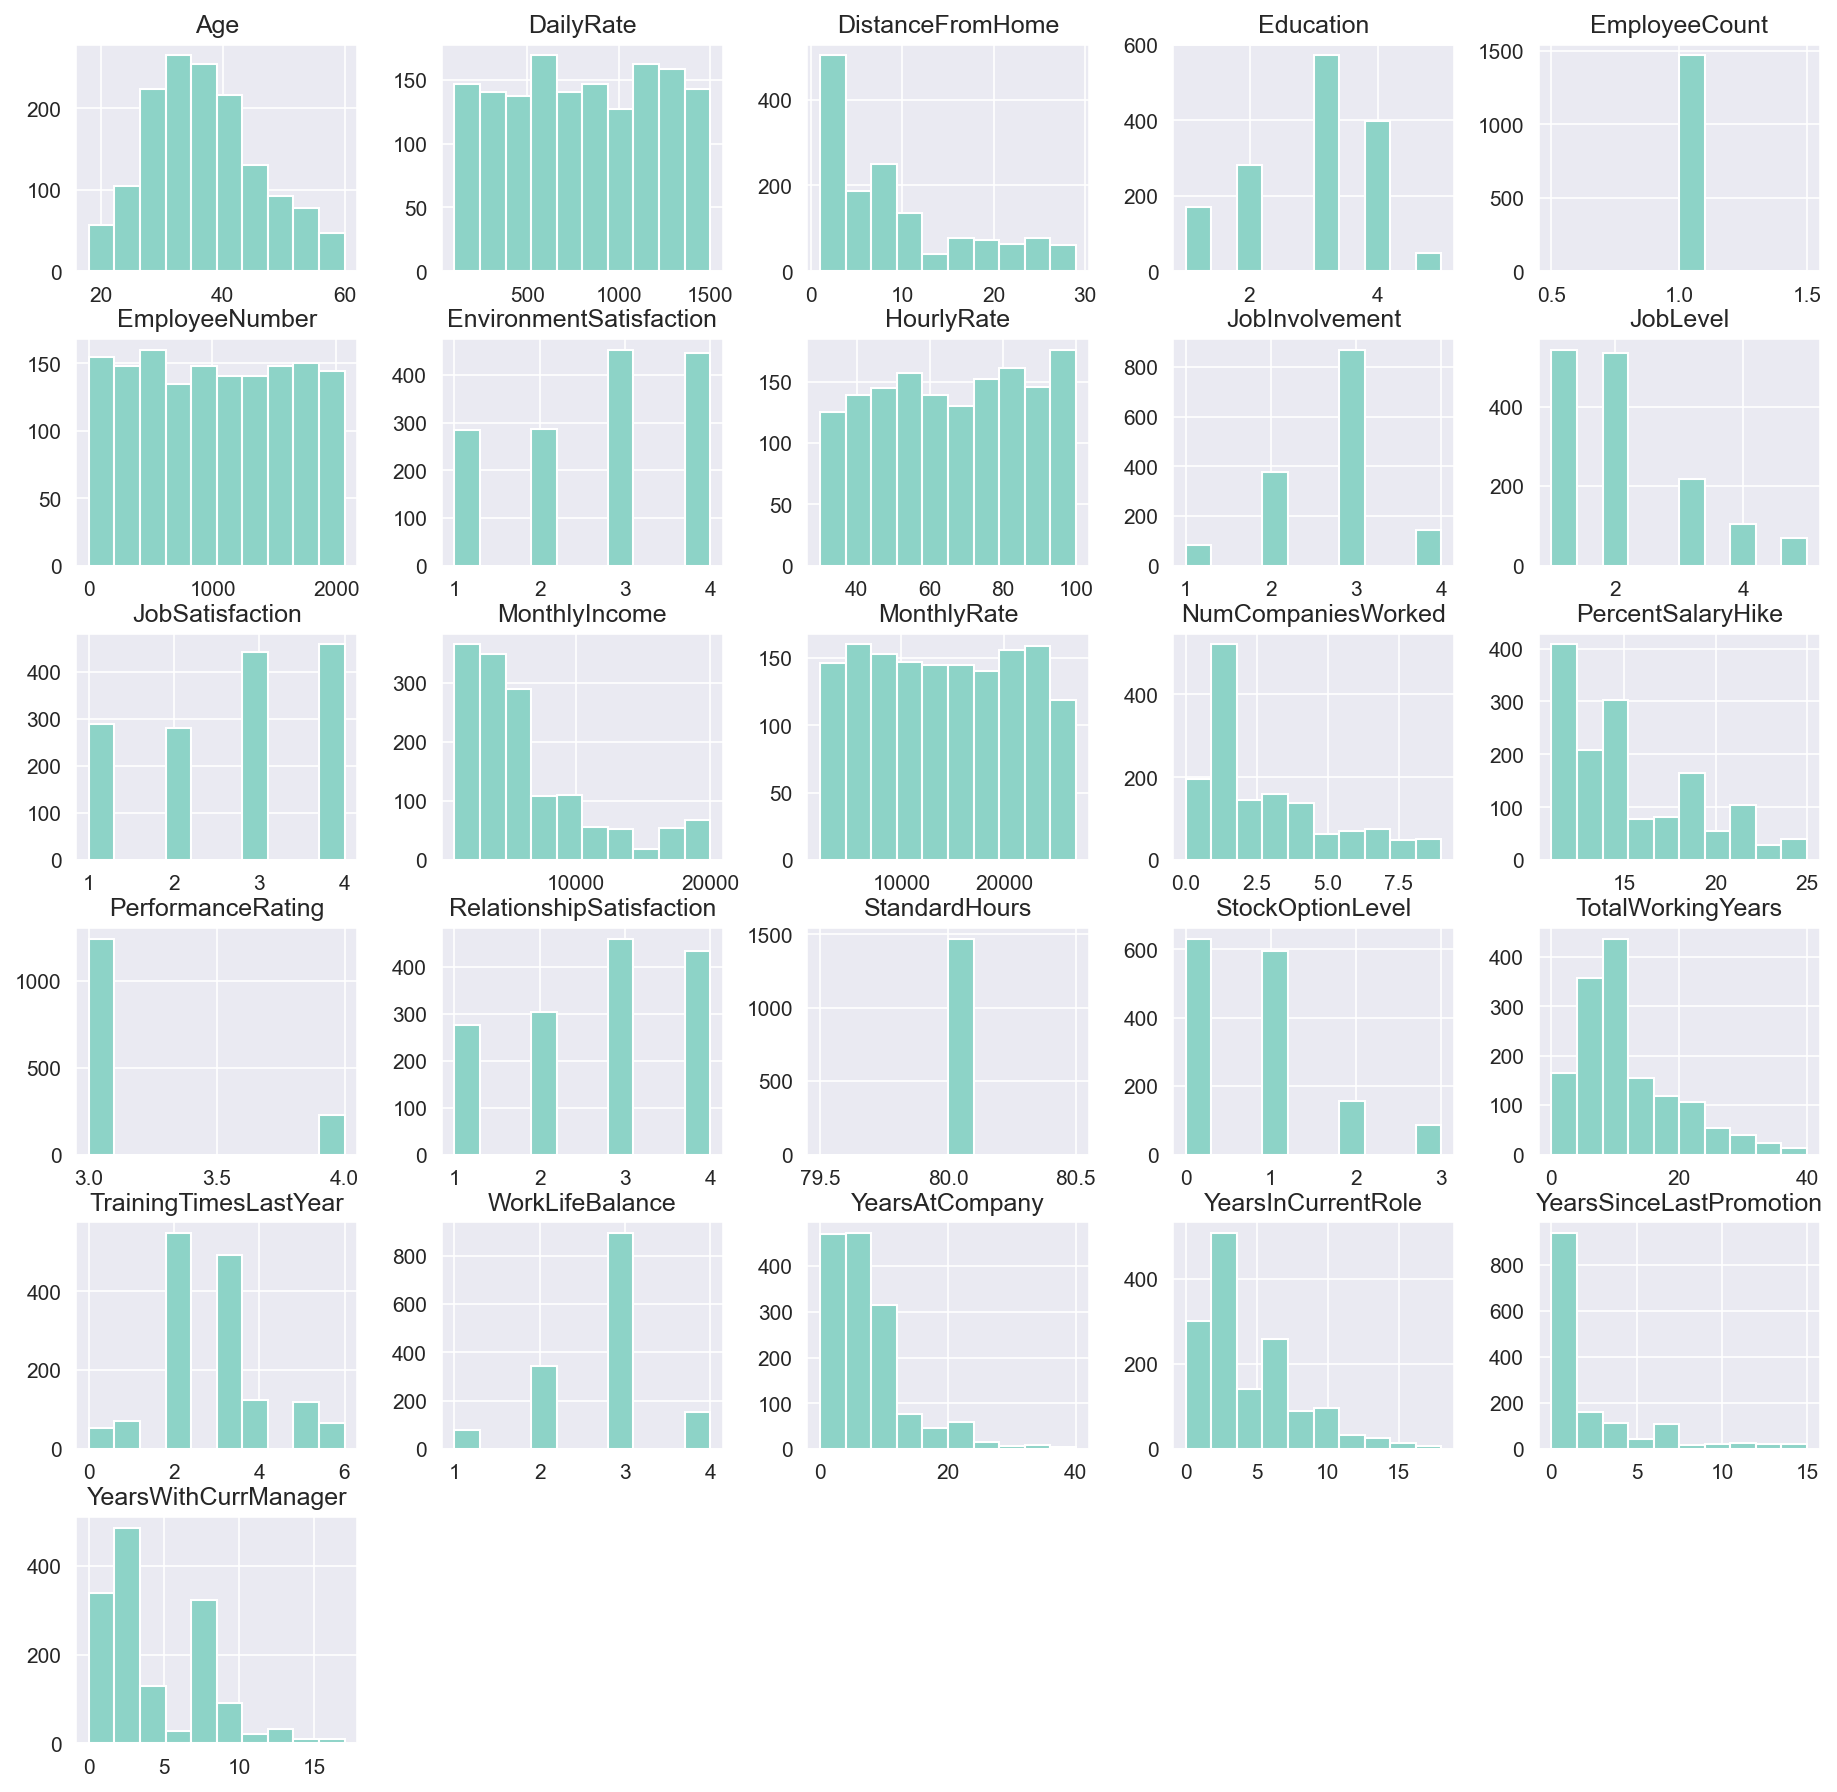

Columns not included above: {'EducationField', 'Department', 'BusinessTravel', 'Over18', 'OverTime', 'MaritalStatus', 'JobRole', 'Gender', 'Attrition'}


In [31]:
# Difficult to gauge anything form the above, let's look at all the histograms of all numerical columns;

df_main.hist(figsize=(15,15))

plt.show()

# Also detail columns not included in histograms above so we also know what else to consider;

columns_not_included = set(df_main.columns) - set(df_main.describe().columns)
print('Columns not included above: {}'.format(columns_not_included))

A couple observations from the above;

* Performance ratings is a very limited (not sure if this is the right word) characteristic. Performance ratings are really only 3 or a 4.
* All employees are on the same standard hours.
* Nearly all distributions are skewed-left (such as Years characteristics) and MonthlyIncome. While this makes sense, normalisation of the data may be required to make it more appropriate to use as a model feature.

Current action items as a result;

* Drop StandardHours.

In [32]:
# Let's have a quick look at the non-numerical columns before proceeding to specific univariate analysis

for col in columns_not_included:
    print(col,'\n')
    print(df_main[col].value_counts())
    print("*************************************\n")


EducationField 

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
*************************************

Department 

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
*************************************

BusinessTravel 

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
*************************************

Over18 

Y    1470
Name: Over18, dtype: int64
*************************************

OverTime 

No     1054
Yes     416
Name: OverTime, dtype: int64
*************************************

MaritalStatus 

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64
*************************************

JobRole 

Sales Executive              326
Research Scientist           292
Laboratory Technician 

A couple more observations from the above;

* Over18 can be dropped as this is redundant data;
* Attrition (which is the target) is imbalanced, with a large amount being 'no'. Infact it's very imbalanced with ~84% being no.
* We'd expect many of these non-numerical columns to have a large impact on attrition, such as Department, Role and OverTime. Need to be sure to include these.
*(Let's ordinal encode: Attrition, OverTime and Business Travel)
*(Let's one-hot encode: Department, Marital Status and Gender)

## Let's drop all the columns mentioned before and encode categorical variables.

In [33]:
# Let's drop before:

df_main.drop(labels=['EmployeeCount', 'EmployeeNumber','StandardHours','Over18'], axis=1,inplace=True)

# Ordinal encode; attrition, overtime and business travel

ordinal_encode_mask = {'Attrition': {'Yes': 1, 'No': 0}, 'OverTime': {'Yes': 1, 'No': 0}, 'BusinessTravel': {'Travel_Frequently':2, 'Travel_Rarely':1,'Non-Travel':150}}
df_main.replace(ordinal_encode_mask, inplace=True)

# One hot encoding; department, martial status and gender

df_main['OHE_Department'] = df_main['Department']
df_main['OHE_MaritalStatus'] = df_main['MaritalStatus']
df_main['OHE_Gender'] = df_main['Gender']

df_main = pd.get_dummies(df_main, columns=['OHE_Department', 'OHE_MaritalStatus', 'OHE_Gender'])

# Check to make sure correct number

print('Number of columns: {}'.format(len(df_main.columns)))

Number of columns: 39
   Age  Attrition  BusinessTravel  DailyRate              Department  \
0   41          1               1       1102                   Sales   
1   49          0               2        279  Research & Development   
2   37          1               1       1373  Research & Development   
3   33          0               2       1392  Research & Development   
4   27          0               1        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  HourlyRate  JobInvolvement  JobLevel                JobRole  \
0  Female          94     

In [34]:
# Let's also show the attributes we're going to investigate
remain_columns = ", ".join(df_main.columns)

print(print("Full list of attributes: {}".format(remain_columns)))

Full list of attributes: Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, OHE_Department_Human Resources, OHE_Department_Research & Development, OHE_Department_Sales, OHE_MaritalStatus_Divorced, OHE_MaritalStatus_Married, OHE_MaritalStatus_Single, OHE_Gender_Female, OHE_Gender_Male
None


Broadly speaking, there are really four key categories we'll investigate:

1. Features inherent to the employee - Age, Gender, Education, Marital status, NumCompaniesWorked, DistanceFromHome
2. Management policy influenced - Income, Training, JobRole, Department, PercentSalaryHike (relation to PerformanceRating!), OverTime, JobSatisfaction, AverageEnvironmentSatisfaction, WorkLifeBalance

## Features Inherent to the Employee

What are some key thoughts here?

* Age, gender, education and marital status might be pair-wise correlated, investigate potential relationships here.
* What do the individual distributions of age, gender and education look like? What does it mean in the context of this business and the market for this business (info. not available)?
* What is the impact of these on attrition? Furthermore, where should we focus our policies?

### Age and Number of Companies

In [35]:
print('The mean age is {:.2f} and the standard deviation is {:.2f}'.format(df_main.mean()['Age'],df_main.std()['Age']))

The mean age is 36.92 and the standard deviation is 9.14


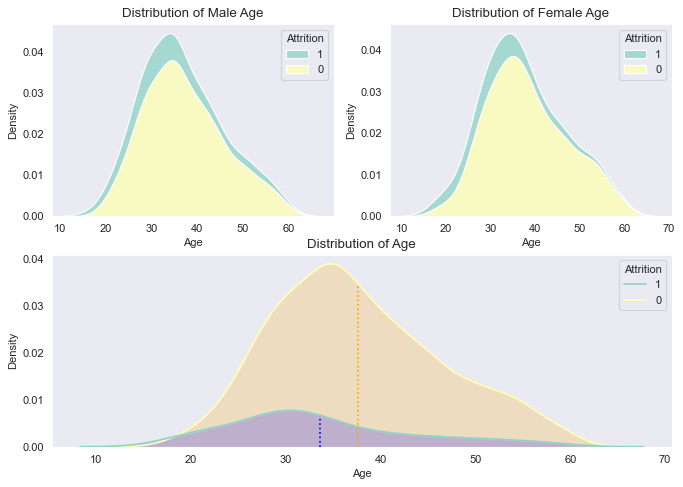

In [54]:
# Plot distributions by Age

male_hist = df_main.loc[df_main['Gender'] == 'Male'][['Age','Attrition']]
female_hist = df_main.loc[df_main['Gender'] == 'Female'][['Age','Attrition']]

hue_order = [1, 0]

# set up gridspec

fig = plt.figure(figsize=(10,7),dpi=80)
gs = gridspec.GridSpec(2,2, figure=fig)

ax_1 = plt.subplot(gs[0,0])
ax_2 = plt.subplot(gs[0,1])
ax_3 = plt.subplot(gs[1,:])

# plot

ax_1 = sns.kdeplot(data=male_hist, x='Age', hue='Attrition',ax=ax_1, hue_order = hue_order, fill=True,multiple='stack')
ax_1.set_title('Distribution of Male Age')

ax_2 = sns.kdeplot(data=female_hist, x='Age', hue='Attrition',ax=ax_2, hue_order = hue_order, fill=True,multiple='stack')
ax_2.set_title('Distribution of Female Age')

ax_3 = sns.kdeplot(data=df_main, x='Age',hue='Attrition',ax=ax_3,hue_order = hue_order, shade=False)
ax_3.set_title('Distribution of Age')

mean_3_att_yes = df_main.loc[df_main['Attrition'] == 1]['Age'].mean()
mean_3_att_no = df_main.loc[df_main['Attrition'] == 0]['Age'].mean()

# plot the mean lines

kde3_line = ax_3.lines[0]
kde3_line2 = ax_3.lines[1]

xs1 = kde3_line.get_xdata()
ys1 = kde3_line.get_ydata()
height1 = np.interp(mean_3_att_no, xs1, ys1)
ax_3.vlines(mean_3_att_no, 0, height1, color='orange', ls=':')
ax_3.fill_between(xs1, 0, ys1, facecolor='orange', alpha=0.2)

xs2 = kde3_line2.get_xdata()
ys2 = kde3_line2.get_ydata()
height2 = np.interp(mean_3_att_yes, xs2, ys2)
ax_3.vlines(mean_3_att_yes, 0, height2, color='blue', ls=':')
ax_3.fill_between(xs2, 0, ys2, facecolor='blue', alpha=0.2)

plt.show()

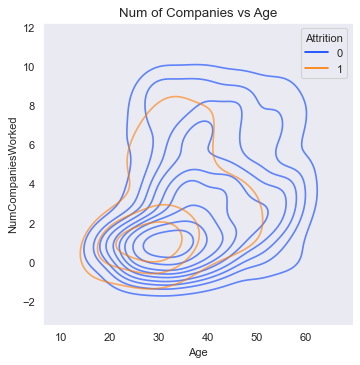

In [37]:
# number of companies worked vs Age

fig, ax = plt.subplots(figsize=(5,5),dpi=80)

sns.kdeplot(x='Age', y='NumCompaniesWorked', data=df_main, ax=ax, hue='Attrition', fill=False,alpha=0.6, palette='bright')
ax.set_title('Num of Companies vs Age')

plt.show()

### Gender

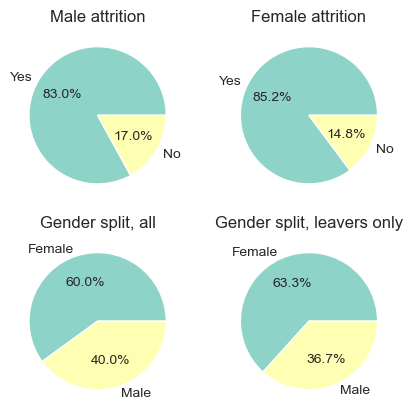

In [38]:
# Plot pie charts by leavers

pie_labels = ['Yes', 'No']

male_female = df_main['Gender'].value_counts().values
male_female_leavers = df_main.loc[df_main['Attrition']==1]['Gender'].value_counts().values
male_attrition = df_main.loc[df_main['Gender'] == 'Male']['Attrition'].value_counts().values
female_attrition = df_main.loc[df_main['Gender'] == 'Female']['Attrition'].value_counts().values

fig, ax = plt.subplots(2,2,figsize=(5,5),dpi=100)

ax[0,0].pie(x=male_attrition, labels=pie_labels,autopct='%1.1f%%')
ax[0,0].set_title('Male attrition')
ax[0,1].pie(x=female_attrition, labels=pie_labels,autopct='%1.1f%%')
ax[0,1].set_title('Female attrition')
ax[1,0].pie(x=male_female, labels=df_main['Gender'].unique(),autopct='%1.1f%%')
ax[1,0].set_title('Gender split, all')
ax[1,1].pie(x=male_female_leavers, labels=df_main.loc[df_main['Attrition']==1]['Gender'].unique(),autopct='%1.1f%%')
ax[1,1].set_title('Gender split, leavers only')
plt.show()

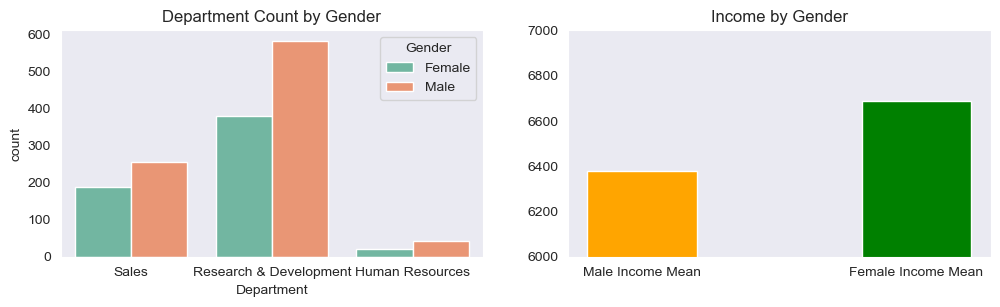

In [39]:
# Let's have a look at department by gender and income by gender as well

fig, ax = plt.subplots(1,2,figsize=(12,3),dpi=100)

# Department Count by Gender

sns.countplot(data=df_main,x='Department',hue='Gender',ax=ax[0], palette='Set2')
ax[0].set_title('Department Count by Gender')

# Income by Gender

male_income_mean = df_main.loc[df_main['Gender'] == 'Male', 'MonthlyIncome'].mean()
female_income_mean = df_main.loc[df_main['Gender'] == 'Female', 'MonthlyIncome'].mean()

ax[1].bar(x=['Male Income Mean', 'Female Income Mean'],height=[male_income_mean, female_income_mean],width=.4,color=['orange','green'])
ax[1].set_title('Income by Gender')
ax[1].set_ylim([6000,7000])
plt.show()

In [40]:
# Job roles by Gender



### Education Levels

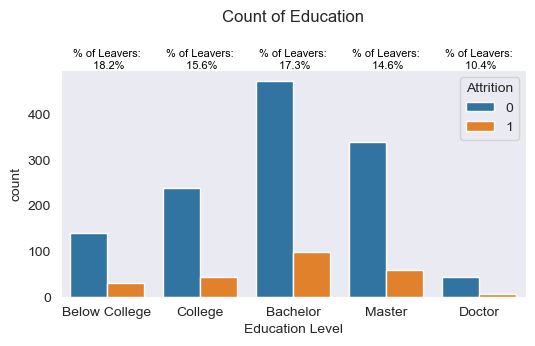

In [49]:
# create labels for education levels based on data dictionary

education_level_labels = ['Below College', 'College', 'Bachelor', 'Master', 'Doctor']
education_level_dict = dict(zip(range(1,6),education_level_labels))

fig, ax = plt.subplots(figsize=(6,3),dpi=100)

df_main['EducationLabelled'] = df_main['Education'].apply(lambda x: education_level_dict[x])

ax = sns.countplot(data=df_main[['EducationLabelled', 'Attrition']],x='EducationLabelled', 
                   hue='Attrition',palette='tab10', order=education_level_labels)
ax.set_title('Count of Education',pad=35)
ax.set_xlabel('Education Level')

# calculate attrition levels

perc_education_attrition = (df_main.loc[df_main['Attrition'] == 1, 'Education'].value_counts() / (df_main['Education'].value_counts())) * 100

# annotate with attrition levels

for x in range(1,6):
    ax.text(x-1, 500,s='% of Leavers:\n {:.1f}%'.format(perc_education_attrition[x]), horizontalalignment='center',
           fontdict = dict(color='black',fontsize=8))
    

plt.show()

In [42]:
# but is it more correlation than casuation - is it perhaps tied 
# down to the nature of the job role (i.e. turnover is higher in jobs with lower barrier of entry)
# or perhaps it is simply that those with lower level degrees are simply younger folk (generational differences?)

# check most common jobs

print("**********************************************************")
print("The most common job role for education levels")
print("**********************************************************\n")

for i in range(1,6):
    manager_perc = df_main.loc[df_main['Education'] == i, 'JobRole'].value_counts()['Manager'] / df_main.loc[df_main['Education'] == i, 'JobRole'].value_counts().sum()
    print('{}:'.format(education_level_dict[i]))
    print('Most common job: {}'.format(df_main.loc[df_main['Education'] == i, 'JobRole'].value_counts().idxmax()))
    print('% of managers: {:.2f}%'.format(manager_perc*100))
    print('===============================')

**********************************************************
The most common job role for education levels
**********************************************************

Below College:
Most common job: Research Scientist
% of managers: 5.29%
College:
Most common job: Sales Executive
% of managers: 6.74%
Bachelor:
Most common job: Research Scientist
% of managers: 6.99%
Master:
Most common job: Sales Executive
% of managers: 7.29%
Doctor:
Most common job: Sales Executive
% of managers: 10.42%


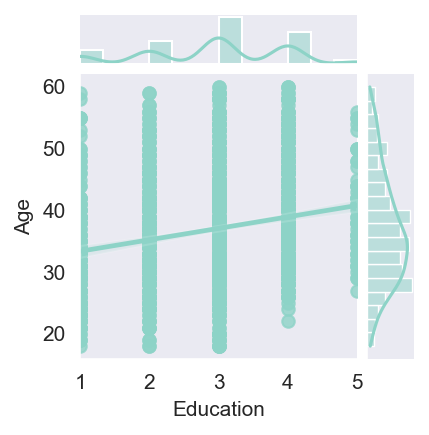

In [43]:
# Let's have a look at education and age as well

sns.jointplot(x='Education', y='Age', data=df_main, kind='reg',height=3)

ax.set_title('Age by Education')

plt.show()

### DistanceFromHome

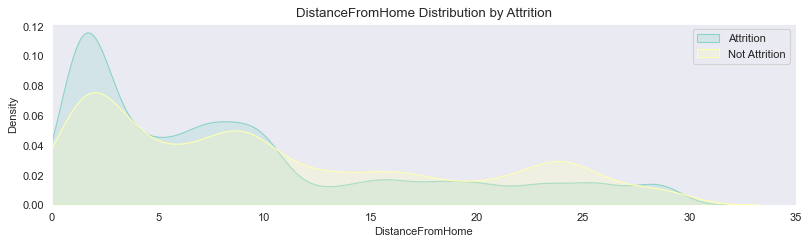

DistanceFromHome, Att Yes, Mean:	 10.63
DistanceFromHome, Att No, Mean:		 8.92


In [44]:
# Let's have a look at Distance from Home attrition levels

fig, ax = plt.subplots(figsize=(12,3),dpi=80)

sns.kdeplot(x=df_main.loc[df_main['Attrition'] == 0, 'DistanceFromHome'], ax=ax,fill=True,label='Attrition',bw_adjust=.5)
sns.kdeplot(x=df_main.loc[df_main['Attrition'] == 1, 'DistanceFromHome'], ax=ax,fill=True,label='Not Attrition',bw_adjust=.5)

ax.set_title('DistanceFromHome Distribution by Attrition')
ax.legend()
ax.set_xlim([0,35])
plt.show()


# Let's also just print the mean distances

dfh_mean_att = df_main.loc[df_main['Attrition'] == 1, 'DistanceFromHome'].mean()
dfh_mean_attno = df_main.loc[df_main['Attrition'] == 0, 'DistanceFromHome'].mean()

print('DistanceFromHome, Att Yes, Mean:\t {:.2f}'.format(dfh_mean_att))
print('DistanceFromHome, Att No, Mean:\t\t {:.2f}'.format(dfh_mean_attno))

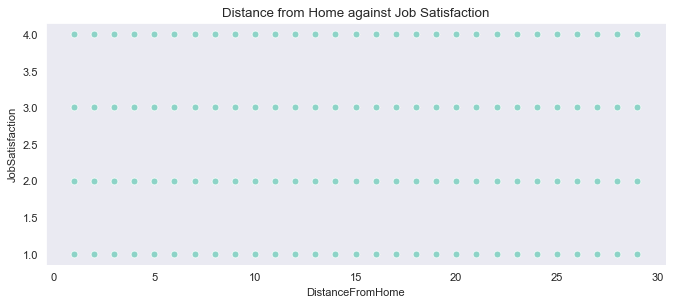

In [53]:
# Let's have a look at if DistanceFromHome affects job satisfaction

fig = plt.figure(figsize=(10,4),dpi=80)

ax = sns.scatterplot(x='DistanceFromHome', y='JobSatisfaction', data=df_main)

ax.set_title('Distance from Home against Job Satisfaction')

plt.show()

### Summary from the Above (Inherent Features)

Observations include:
* Leavers are more likely to be younger and have worked for fewer companies. Potential interpretations could be; (a) this could simply just be consistent with the theory that older workers are unlikely to leave in fears of a tougher job market / younger workers are more likely to be hired (in spite of age discrimination laws) (b) older workers are more likely to have responsibilities such as families
* Number of companies worked for vs Age is correlated. Possible interpretation could be; (a) simply that older workers have had more of a chance to work for more companies
* Females make up more relatively more of leavers than Males.
* 

## Correlation Matrix

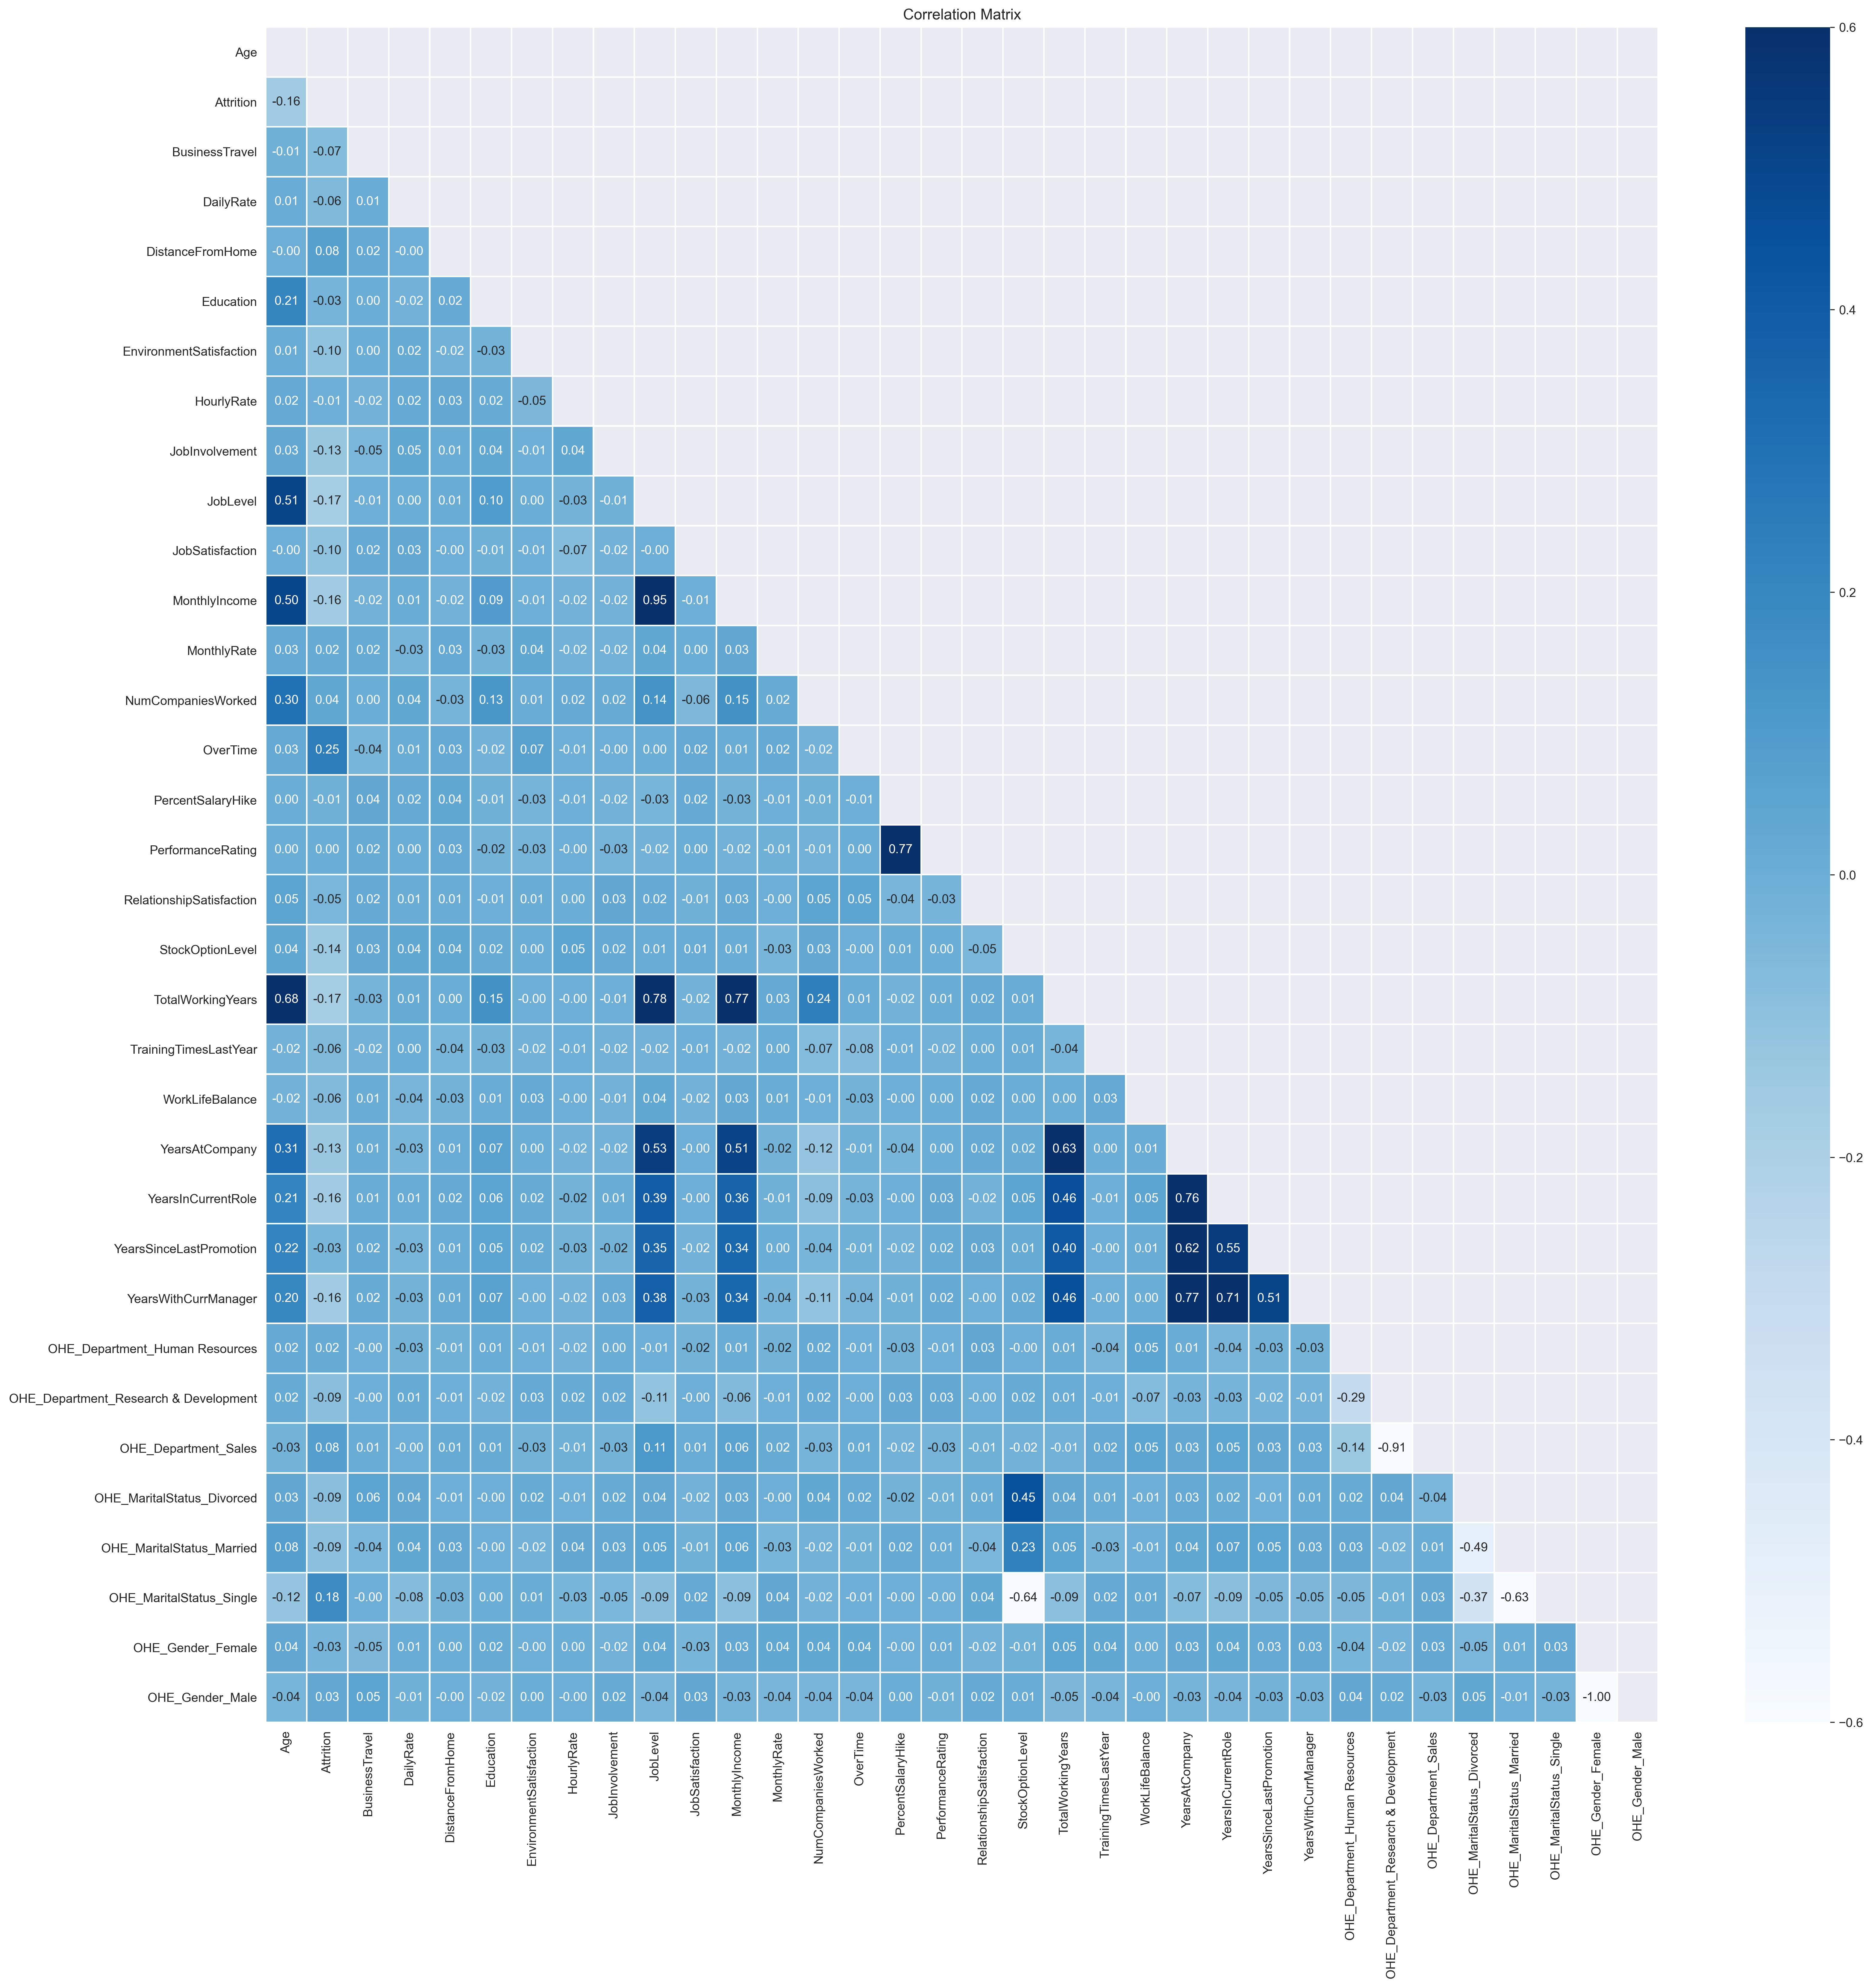

In [52]:
df_main_corr = df_main.corr()

mask = np.triu(np.ones_like(df_main_corr,dtype=bool))

fig, ax = plt.subplots(figsize=(25,25),dpi=300)

sns.heatmap(df_main_corr, mask=mask,cmap='Blues',linewidths=1,annot=True,fmt='.2f',vmin=-.6,vmax=.6,robust=True)
ax.set_title('Correlation Matrix')
plt.show()